In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report

In [59]:
bank_data=pd.read_csv('Churn_Modelling.csv')

In [60]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [61]:
bank_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [62]:
bank_data.shape

(10000, 14)

In [63]:
bank_data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [64]:
bank_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [65]:
bank_data.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

In [66]:
bank_data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [67]:
bank_data['Geography'].replace({'France':0,'Germany':1,'Spain':2}, inplace=True)
bank_data['Gender'].replace({'Male':0,'Female':1}, inplace=True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'No. of Customer')

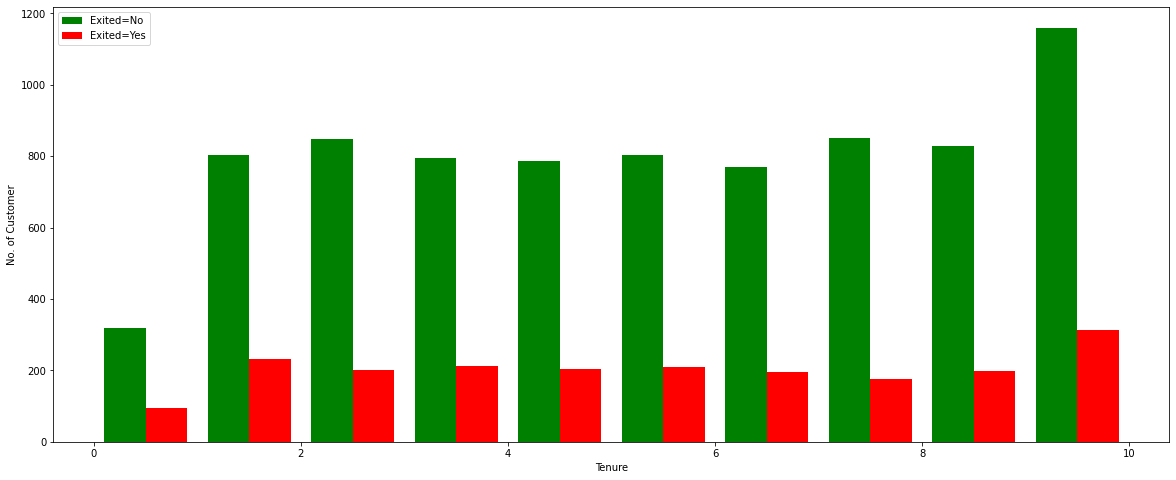

In [68]:
data_no=bank_data[bank_data['Exited']==0].Tenure
data_yes=bank_data[bank_data['Exited']==1].Tenure
plt.figure(figsize=(20,8))
plt.hist([data_no,data_yes], color=('Green','Red'), label=['Exited=No','Exited=Yes'])

plt.legend()
plt.xlabel("Tenure")
plt.ylabel("No. of Customer")

In [69]:
mms=MinMaxScaler()

In [70]:
col=['CreditScore','Age','Balance','EstimatedSalary','Tenure']
for i in col:
  bank_data[col]=mms.fit_transform(bank_data[col])

In [71]:
bank_data.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8822,0.386,0,0,0.621622,0.4,0.000000,2,1,1,0.741542,0
1733,0.528,1,0,0.189189,0.7,0.396427,2,1,1,0.255552,0
5319,0.590,1,0,0.094595,0.1,0.627362,2,1,0,0.465352,0
4976,0.956,1,1,0.094595,0.7,0.575341,1,1,0,0.583064,0
8548,0.334,2,0,0.378378,0.4,0.000000,1,1,0,0.111817,0


In [75]:
x=bank_data.drop('Exited', axis=1)
y=bank_data[['Exited']]

In [76]:
xtrain, xtest, ytrain,ytest=train_test_split(x,y, test_size=0.3)

##Random Forest CLassifier

In [80]:
clf=RandomForestClassifier(n_estimators=100)

In [81]:
clf.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [82]:
ypred=clf.predict(xtest)

In [83]:
ypred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [85]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      2383
           1       0.76      0.46      0.58       617

    accuracy                           0.86      3000
   macro avg       0.82      0.71      0.75      3000
weighted avg       0.85      0.86      0.85      3000



In [90]:
len(xtrain.columns)

10

##Artificial Neural Network

In [95]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(10,), activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='tanh')]
)
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(xtrain, ytrain, epochs=100)

Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 2.4899 - accuracy: 0.7956
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.8545 - accuracy: 0.7366
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6037 - accuracy: 0.7766
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.5401 - accuracy: 0.7906
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.5224 - accuracy: 0.7961
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.5093 - accuracy: 0.7971
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.5037 - accuracy: 0.7971
Epoch 8/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4973 - accuracy: 0.7971
Epoch 9/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4969 - accuracy: 0.7973
Epoch 10/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4866 - accura

In [96]:
model.evaluate(xtest,ytest)

94/94 [==============================] - 0s 1ms/step - loss: 0.3784 - accuracy: 0.8573


[0.37842118740081787, 0.8573333621025085]

In [97]:
yp = model.predict(xtest)
yp[:5]

array([[0.32177886],
       [0.15167528],
       [0.3483571 ],
       [0.04497704],
       [0.17925799]], dtype=float32)

In [98]:
y_pred=[]
for i in yp:
  if i<0.5:
    y_pred.append(0)
  else:
    y_pred.append(1)
 

In [99]:
y_pred[:5]

[0, 0, 0, 0, 0]

In [100]:
ytest[:5]

,Exited
9986,0
9231,0
8465,1
3031,0
4474,0


In [101]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2383
           1       0.77      0.43      0.56       617

    accuracy                           0.86      3000
   macro avg       0.82      0.70      0.74      3000
weighted avg       0.85      0.86      0.84      3000



In [103]:
cm = tf.math.confusion_matrix(labels=ytest,predictions=y_pred)

Text(69.0, 0.5, 'Truth')

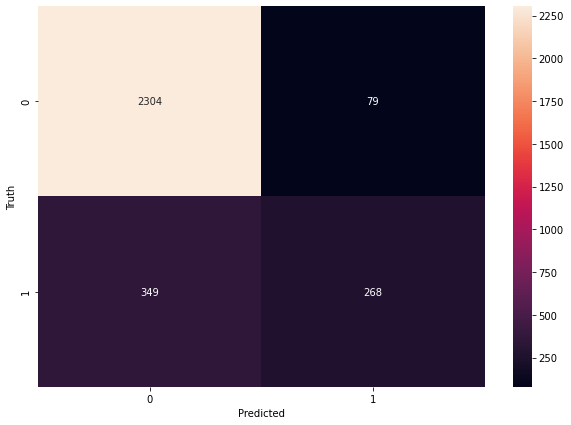

In [106]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')